## Install 

In [ ]:
!pip install orsvm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00


# Connect

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# read data 

In [ ]:
import pandas as pd 
import orsvm  
import numpy as np 
import seaborn as sns
import plotly.express as px


In [ ]:
data= pd.read_csv("drive/MyDrive/orsvm/orsvm/DATA/12_DATA_tic_tac_toc.csv")


In [ ]:
data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


# Data Analysis 

In [ ]:
print(f'shape of data {data.shape}')
print ( f'number of classes : {data["status"].nunique()}' )
print ( f'dtype of classes : {data["status"].dtype}' )


shape of data (215, 13)
number of classes : 2
dtype of classes : object


In [ ]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
categorical =[]
numerical = []

for col in data.columns : 
  if data[col].dtype == object :
    categorical.append(col)
  elif data[col].dtype == float :
    numerical.append(col)
  elif data[col].dtype == int :
    numerical.append(col)
  else : 
    print (f'data {col} dtype is : {data[col].dtype}') 

print(f'categorical data includes : {categorical}')
print(f'numerical data includes : {numerical}')

categorical data includes : ['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status']
numerical data includes : ['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent']


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB
None


In [ ]:
data.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [ ]:
data.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [ ]:
data.corr()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364
emp_test_percentage,0.261993,0.245113,0.224470,1.000000,0.218055
mba_percent,0.388478,0.354823,0.402364,0.218055,1.000000


In [ ]:
for col in data.columns : 
  print(f'data[{col}] nuinque is : {data[col].nunique()} , data dtype is : {data[col].dtype}') 
  

data[gender] nuinque is : 2 , data dtype is : object
data[ssc_percentage] nuinque is : 103 , data dtype is : float64
data[ssc_board] nuinque is : 2 , data dtype is : object
data[hsc_percentage] nuinque is : 97 , data dtype is : float64
data[hsc_board] nuinque is : 2 , data dtype is : object
data[hsc_subject] nuinque is : 3 , data dtype is : object
data[degree_percentage] nuinque is : 89 , data dtype is : float64
data[undergrad_degree] nuinque is : 3 , data dtype is : object
data[work_experience] nuinque is : 2 , data dtype is : object
data[emp_test_percentage] nuinque is : 100 , data dtype is : float64
data[specialisation] nuinque is : 2 , data dtype is : object
data[mba_percent] nuinque is : 205 , data dtype is : float64
data[status] nuinque is : 2 , data dtype is : object


#preprocessing data 

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical : 
  data[col] = LE.fit_transform(data[col]) 


# Data visualization


<AxesSubplot:xlabel='ssc_percentage', ylabel='hsc_percentage'>

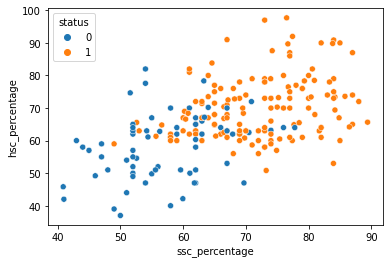

In [ ]:
sns.scatterplot(x= 'ssc_percentage' , y= 'hsc_percentage',hue= "status" ,data =data ) 


<AxesSubplot:xlabel='degree_percentage', ylabel='emp_test_percentage'>

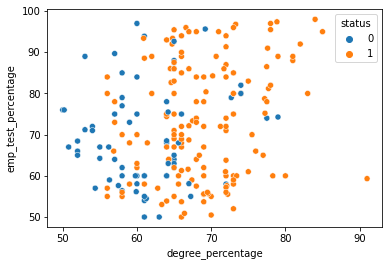

In [ ]:
sns.scatterplot(x= 'degree_percentage' , y= 'emp_test_percentage',hue= "status" ,data =data ) 


<AxesSubplot:xlabel='mba_percent', ylabel='ssc_percentage'>

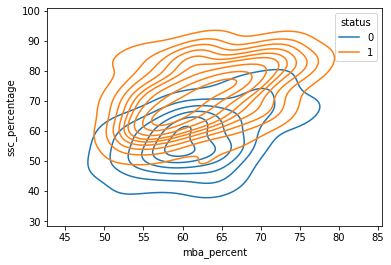

In [ ]:
sns.kdeplot(x= 'mba_percent' , y= 'ssc_percentage',hue= "status" ,data =data ) 

In [ ]:
px.scatter(data_frame=data,
           x='degree_percentage',
           y='hsc_percentage',
           size='undergrad_degree',
           color='status', )


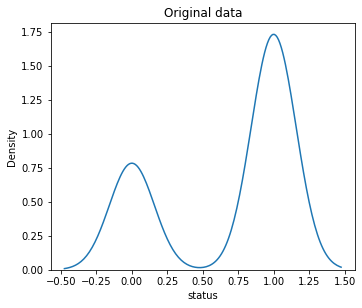

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.title('Original data');
sns.kdeplot(x='status', data=data);



# Split data 

In [ ]:
y = data['status']
X = data.drop(columns=['status'])
print(f'shape of data {X.shape}')
X.head()

shape of data (215, 12)


,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y ,test_size = .20 , stratify=y )

In [ ]:
print(f'X.shape : {X.shape}')
print(f'y.shape : {y.shape}')
print(f'x_train.shape : {x_train.shape}')
print(f'y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}')
print(f'y_test.shape : {y_test.shape}')

X.shape : (215, 12)
y.shape : (215,)
x_train.shape : (172, 12)
y_train.shape : (172,)
x_test.shape : (43, 12)
y_test.shape : (43,)


In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
x_train.shape

(172, 12)

In [ ]:
print(f' y_train.shape {y_train.shape}')
print(f' y_train.shape {y_train}')

 y_train.shape (172,)
 y_train.shape [1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0
 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1]


# Model fit 

In [ ]:
try:
    model =orsvm.Model(kernel="rbf",order=2,T=0.45 )# Fit the model to the training data
    Weights, SupportVectors, Bias, KernelInstance = model.ModelFit(x_train,y_train)
    acc = model.ModelPredict(x_test,y_test,Bias,KernelInstance)
except ArithmeticError as e:
    print("An error occurred while fitting the model:", e)

acc


0.6976744186046512

In [ ]:
try:
    model =orsvm.Model(kernel="Chebyshev",order=4,T=0.45 )# Fit the model to the training data
    Weights, SupportVectors, Bias, KernelInstance = model.ModelFit(x_train,y_train)
    acc = model.ModelPredict(x_test,y_test,Bias,KernelInstance)
except ArithmeticError as e:
    print("An error occurred while fitting the model:", e)

acc


0.6744186046511628

In [ ]:
try:
    model =orsvm.Model(kernel="Legendre",order=6,T=0.45 )# Fit the model to the training data
    Weights, SupportVectors, Bias, KernelInstance = model.ModelFit(x_train,y_train)
    acc = model.ModelPredict(x_test,y_test,Bias,KernelInstance)
except ArithmeticError as e:
    print("An error occurred while fitting the model:", e)

acc


0.6744186046511628

In [ ]:
try:
    model =orsvm.Model(kernel="Gegenbauer",order=6,T=0.45 )# Fit the model to the training data
    Weights, SupportVectors, Bias, KernelInstance = model.ModelFit(x_train,y_train)
    acc = model.ModelPredict(x_test,y_test,Bias,KernelInstance)
except ArithmeticError as e:
    print("An error occurred while fitting the model:", e)

acc


0.6511627906976745

In [ ]:
try:
    model =orsvm.Model(kernel="Jacobi",order=6,T=0.45 )# Fit the model to the training data
    Weights, SupportVectors, Bias, KernelInstance = model.ModelFit(x_train,y_train)
    acc = model.ModelPredict(x_test,y_test,Bias,KernelInstance)
except ArithmeticError as e:
    print("An error occurred while fitting the model:", e)

acc


0.6744186046511628

In [ ]:
model.SaveToJason("drive/MyDrive/orsvm/orsvm/output8.json", Weights=Weights, SupportVectors=SupportVectors, Bias=Bias, accuracy=acc)

# Visualizer